## Instalacion de librerias necesarias

In [ ]:
!pip install locales
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install textblob
!pip install es-core-news-sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-03-07 00:55:39.665906: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 00:55:40.587071: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-07 00:55:40.587193: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plu

## Importamos las librerias instaldadas

In [ ]:
import json
import numpy as np
import pandas as pd
import re, string

# Import NLTK libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import spacy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import es_core_news_sm
nlp = es_core_news_sm.load()


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## 1. Cargamos los articulos de prensa del area economica en formato csv

In [ ]:
df= pd.read_csv('articuloseconomia.csv')
df

,Unnamed: 0,Unnamed: 0.1,codigo,fecha,titular,detalle,texto
0,0,0,article771270,/ 17 de enero de 1977,El bono BCB Navideño cerró con Bs 445 millones...,Las transacciones electrónicas para la compra ...,Entre el 18 de octubre de 2022 y el 28 de febr...
1,1,1,article771270,/ 17 de enero de 1977,Solo faltan ajustes para el inicio de la venta...,ENDE tiene luz verde para el inicio de la expo...,None None Afirmó que la Línea de Transmisión “...
2,2,2,article771157,/ 17 de enero de 1977,El Gobierno habilita rutas alternas por Chile ...,"Tras la habilitación, se otorgó 145 permisos p...",Luego de realizar gestiones con las autoridade...
3,3,3,article771157,/ 17 de enero de 1977,Comunidad Ciudadana denuncia que juez dio luz ...,"El diputado Carlos Alarcón, dice que el proces...",None Alarcón informó que el juicio pretende in...
4,4,4,article771177,/ 17 de enero de 1977,Industriales de La Paz defienden el horario co...,"Sin embargo, dejan en manos de cada industria ...",Las industrias de la ciudad de La Paz definirá...
...,...,...,...,...,...,...,...
20946,26931,2493,article468004,/ 17 de enero de 1977,Compra-venta de casas será reportada a la UIF ...,"Desde enero de 2019, los notarios de Fe Públic...","Desde enero de 2019, los notarios de Fe Públic..."
20947,26933,2495,article467968,/ 17 de enero de 1977,Familiares del vuelo del Chapecoense acceden a...,La empresa de seguros BISA había rechazado el ...,Un «número significativo» de familias de las v...
20948,26935,2497,article467854,/ 17 de enero de 1977,Gobierno promueve acciones de apoyo al increme...,﻿﻿En La Paz se implementan 14 viveros de café...,El Ministerio de Desarrollo Rural y Tierras (M...
20949,26936,2498,article467854,/ 17 de enero de 1977,Gobierno y empresarios analizan por separado p...,La administración central propuso su pago hast...,"El Gobierno y los empresarios analizan, por se..."


## Text Mining

In [ ]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,codigo,fecha,titular,detalle,texto
0,0,0,article771270,/ 17 de enero de 1977,El bono BCB Navideño cerró con Bs 445 millones...,Las transacciones electrónicas para la compra ...,Entre el 18 de octubre de 2022 y el 28 de febr...
1,1,1,article771270,/ 17 de enero de 1977,Solo faltan ajustes para el inicio de la venta...,ENDE tiene luz verde para el inicio de la expo...,None None Afirmó que la Línea de Transmisión “...
2,2,2,article771157,/ 17 de enero de 1977,El Gobierno habilita rutas alternas por Chile ...,"Tras la habilitación, se otorgó 145 permisos p...",Luego de realizar gestiones con las autoridade...


In [ ]:
# columnas
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'codigo', 'fecha', 'titular', 'detalle',
       'texto'],
      dtype='object')


In [ ]:
# Las columnas importantes son:
df = df[['fecha','titular','detalle','texto']]
df.head()

,fecha,titular,detalle,texto
0,/ 17 de enero de 1977,El bono BCB Navideño cerró con Bs 445 millones...,Las transacciones electrónicas para la compra ...,entre el de octubre de y el de febrero de el b...
1,/ 17 de enero de 1977,Solo faltan ajustes para el inicio de la venta...,ENDE tiene luz verde para el inicio de la expo...,none none afirmó que la línea de transmisión “...
2,/ 17 de enero de 1977,El Gobierno habilita rutas alternas por Chile ...,"Tras la habilitación, se otorgó 145 permisos p...",luego de realizar gestiones con las autoridade...
3,/ 17 de enero de 1977,Comunidad Ciudadana denuncia que juez dio luz ...,"El diputado Carlos Alarcón, dice que el proces...",none alarcón informó que el juicio pretende in...
4,/ 17 de enero de 1977,Industriales de La Paz defienden el horario co...,"Sin embargo, dejan en manos de cada industria ...",las industrias de la ciudad de la paz definirá...


In [ ]:
# Verificamos si existe informacion faltante
df["texto"].isnull().sum()

0

## Realizamos la limpieza de los textos mediante transformaciones y lematizamos


In [ ]:
# Eliminamos los caracteres innecesarios.
def eliminarTexto(s):
    s = s.lower()  # Convertimos a minusculas
    s = re.sub('\[.*\]','', s).strip() # Removemos caracteres no necesarios (entre brackets)
    s = s.translate(str.maketrans('', '', string.punctuation)) # Eliminando signos de puntuación
    s = re.sub('\S*\d\S*\s*','', s).strip()  # Removemos palabras que contienen numeros
    return s.strip()

In [ ]:
df.texto = df.texto.apply(lambda x: eliminarTexto(x))
df.texto
df.texto.head()

0    entre el de octubre de y el de febrero de el b...
1    none none afirmó que la línea de transmisión “...
2    luego de realizar gestiones con las autoridade...
3    none alarcón informó que el juicio pretende in...
4    las industrias de la ciudad de la paz definirá...
Name: texto, dtype: object

In [ ]:
# Realizamos la lematizacion
stopwords = nlp.Defaults.stop_words
def lemmatizer(s):
    doc = nlp(s)
    x = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(x)

df['lemma'] =  df["texto"].apply(lambda x: lemmatizer(x))
df.head()

,fecha,titular,detalle,texto,lemma
0,/ 17 de enero de 1977,El bono BCB Navideño cerró con Bs 445 millones...,Las transacciones electrónicas para la compra ...,entre el de octubre de y el de febrero de el b...,octubre y febrero banco central bolivia bcb lo...
1,/ 17 de enero de 1977,Solo faltan ajustes para el inicio de la venta...,ENDE tiene luz verde para el inicio de la expo...,none none afirmó que la línea de transmisión “...,none none línea transmisión “ juana azurduy pa...
2,/ 17 de enero de 1977,El Gobierno habilita rutas alternas por Chile ...,"Tras la habilitación, se otorgó 145 permisos p...",luego de realizar gestiones con las autoridade...,gestión autoridad perú y chile gobierno bolivi...
3,/ 17 de enero de 1977,Comunidad Ciudadana denuncia que juez dio luz ...,"El diputado Carlos Alarcón, dice que el proces...",none alarcón informó que el juicio pretende in...,nonir alarcón juicio pretender inhabilitar pol...
4,/ 17 de enero de 1977,Industriales de La Paz defienden el horario co...,"Sin embargo, dejan en manos de cada industria ...",las industrias de la ciudad de la paz definirá...,industria ciudad paz definir individualmente h...


In [ ]:
# El siguiente DataFrame solo tiene la informacion relevante 
df_clean = df[['texto','lemma']]#,'category']]
df_clean

,texto,lemma
0,entre el de octubre de y el de febrero de el b...,octubre y febrero banco central bolivia bcb lo...
1,none none afirmó que la línea de transmisión “...,none none línea transmisión “ juana azurduy pa...
2,luego de realizar gestiones con las autoridade...,gestión autoridad perú y chile gobierno bolivi...
3,none alarcón informó que el juicio pretende in...,nonir alarcón juicio pretender inhabilitar pol...
4,las industrias de la ciudad de la paz definirá...,industria ciudad paz definir individualmente h...
...,...,...
20946,desde enero de los notarios de fe pública tien...,enero notario fe público obligación reportar r...
20947,un «número significativo» de familias de las v...,« número significativo » familia víctima avión...
20948,el ministerio de desarrollo rural y tierras md...,ministerio desarrollo rural y tierra mdryt mes...
20949,el gobierno y los empresarios analizan por sep...,gobierno y empresario analizar separado propue...


In [ ]:
df_clean['lemma'] = df_clean['lemma'].str.replace('none', ' ')
df_clean['lemma'] = df_clean['lemma'].str.replace(' y ', '')
df_clean

,texto,lemma
0,entre el de octubre de y el de febrero de el b...,octubrefebrero banco central bolivia bcb logra...
1,none none afirmó que la línea de transmisión “...,línea transmisión “ juana azurduy padilla ki...
2,luego de realizar gestiones con las autoridade...,gestión autoridad perúchile gobierno boliviano...
3,none alarcón informó que el juicio pretende in...,nonir alarcón juicio pretender inhabilitar pol...
4,las industrias de la ciudad de la paz definirá...,industria ciudad paz definir individualmente h...
...,...,...
20946,desde enero de los notarios de fe pública tien...,enero notario fe público obligación reportar r...
20947,un «número significativo» de familias de las v...,« número significativo » familia víctima avión...
20948,el ministerio de desarrollo rural y tierras md...,ministerio desarrollo ruraltierra mdryt mes ma...
20949,el gobierno y los empresarios analizan por sep...,gobiernoempresario analizar separado propuesta...


## 3. Analisis exploratorio

(array([6.300e+01, 4.940e+02, 1.837e+03, 3.115e+03, 4.159e+03, 3.012e+03,
        2.103e+03, 1.575e+03, 9.710e+02, 8.060e+02, 5.900e+02, 4.110e+02,
        3.890e+02, 3.090e+02, 2.460e+02, 2.510e+02, 2.160e+02, 1.460e+02,
        9.800e+01, 6.300e+01, 2.600e+01, 7.000e+00, 1.600e+01, 9.000e+00,
        6.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([    0.  ,   214.46,   428.92,   643.38,   857.84,  1072.3 ,
         1286.76,  1501.22,  1715.68,  1930.14,  2144.6 ,  2359.06,
         2573.52,  2787.98,  3002.44,  3216.9 ,  3431.36,  3645.82,
         3860.28,  4074.74,  4289.2 ,  4503.66,  4718.12,  4932.58,
         5147.04,  5361.5 ,  5575.96,  5790.42,  6004.88,  6219.34,
         6433.8 ,  6648.26,  6862.72

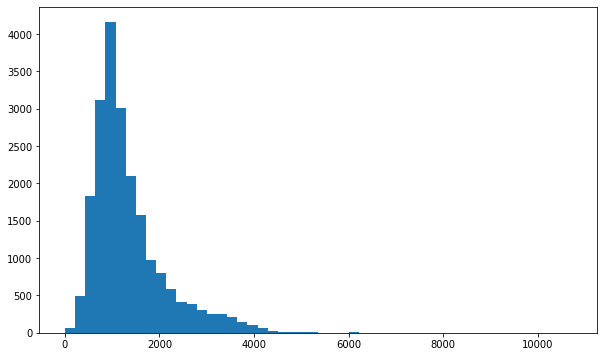

In [ ]:
# Visualizamos el largo de los textos
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean["lemma"]] 
plt.hist(doc_lens, bins = 50)

#### Visualizamos las 50 palabras mas frecuentes en nuestros articulos

In [ ]:
# !pip install wordcloud

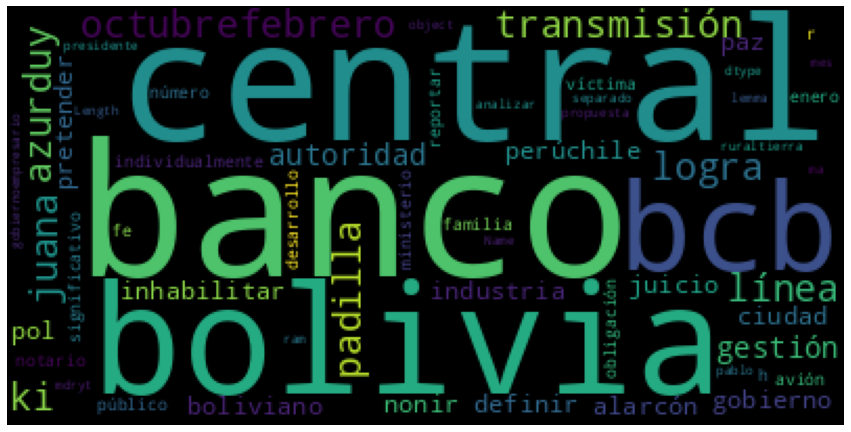

In [ ]:
from wordcloud import WordCloud
maxwords=60
wordcloud = WordCloud(stopwords=stopwords,max_words=maxwords).generate(str(df_clean["lemma"]))

print(wordcloud)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Visualizamos n-grams.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
spanish_stopwords = stopwords.words('spanish')

In [ ]:
def xgrams(s, n=30, g=1):
  vec = CountVectorizer(stop_words=spanish_stopwords, ngram_range=(g,g)).fit(s)
  bagofwords = vec.transform(s)
  suma = bagofwords.sum(axis=0)
  f = [(word, suma[0, index]) for word, index in vec.vocabulary_.items()]
  f = sorted(f, key = lambda x: x[1], reverse=True)
  return f[:n]

In [ ]:
#Print the top 10 words in the unigram frequency
top10uni = xgrams(df_clean['lemma'].values.astype('U'), 10, 1)
df_unigram = pd.DataFrame(top10uni, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,millón,31290
1,año,23454
2,país,21604
3,bolivia,21505
4,empresa,20905
5,boliviano,18605
6,gobierno,17593
7,us,17540
8,nacional,17020
9,bs,14355


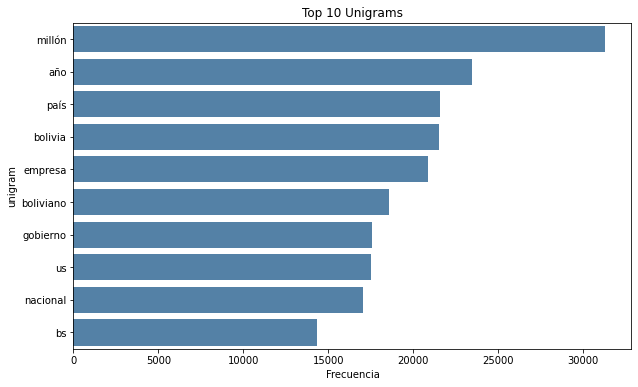

In [ ]:
# Visualizamos los top 10 unigramas

plt.figure(figsize=[10,6])
sns.barplot(x=df_unigram['count'], y=df_unigram['unigram'],color='steelblue')
plt.xlabel("Frecuencia")
plt.title("Top 10 Unigrams")
plt.show()

In [ ]:
# Top 10 bigrams
top10bi = xgrams(df_clean['lemma'].values.astype('U'), 10, 2)
df_bigram = pd.DataFrame(top10bi, columns=['bigram', 'count'])
df_bigram

,bigram,count
0,us millón,13371
1,santa cruz,6427
2,bs millón,6203
3,presidente evo,4028
4,evo morales,3742
5,millón dólares,3412
6,gas natural,3350
7,proyecto ley,1999
8,petrolífero fiscal,1991
9,fiscal boliviano,1970


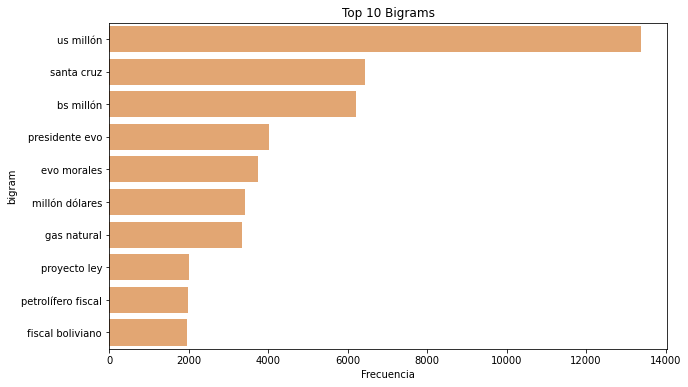

In [ ]:
# Visualizamos los top 10 bigramas

plt.figure(figsize=[10,6])
sns.barplot(x=df_bigram['count'], y=df_bigram['bigram'],color='sandybrown')
plt.xlabel("Frecuencia")
plt.title("Top 10 Bigrams")
plt.show()

In [ ]:
# Top 10 trigram 
top10tri = xgrams(df_clean['lemma'].values.astype('U'), 10, 3)
df_trigram = pd.DataFrame(top10tri, columns=['trigram', 'count'])
df_trigram

,trigram,count
0,presidente evo morales,3278
1,petrolífero fiscal boliviano,1954
2,yacimiento petrolífero fiscal,1950
3,fiscal boliviano ypfb,1704
4,banco central bolivia,1312
5,central bolivia bcb,1122
6,millón us millón,1009
7,instituto nacional estadística,962
8,producto interno bruto,911
9,ministro economíafinanza público,907


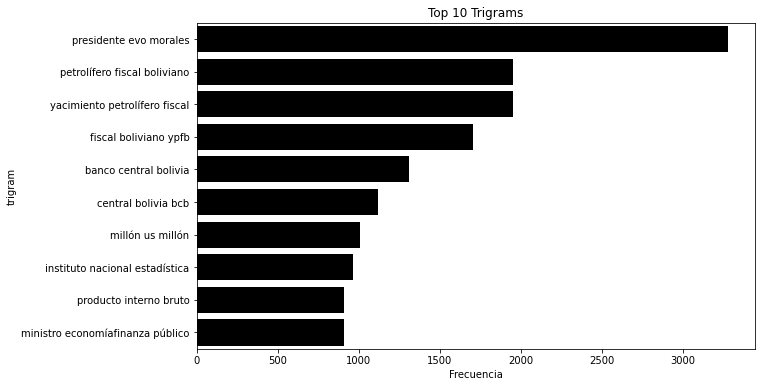

In [ ]:
# Visualizamos los top 10 trigramas

plt.figure(figsize=[10,6])
sns.barplot(x=df_trigram['count'], y=df_trigram['trigram'],color='black')
plt.xlabel("Frecuencia")
plt.title("Top 10 Trigrams")
plt.show()

## 4. Feature Extraction


In [ ]:
#  
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words=spanish_stopwords)

In [ ]:
termMatrix = tfidf.fit_transform(df_clean['lemma'])

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
# Mediante prueba y error, el numero optimo de grupos es 20
num_topics = 20 

nmf_model = NMF(n_components=num_topics, random_state=100)#write your code here

In [ ]:
nmf_model.fit(termMatrix)
len(tfidf.get_feature_names_out())
H = nmf_model.components_

In [ ]:
# lemmas que describen los textos
describen=15

In [ ]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topicos = pd.DataFrame(np.zeros((num_topics, describen)), index=[f'Grupo {i}' for i in range(num_topics)],columns=[f'{i}' for i in range(describen)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:describen]
    topicos.iloc[i] = words[ix]

topicos.head(num_topics)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Grupo 0,productor,producción,quinua,desarrollo,hectárea,grano,semilla,alimento,agropecuario,producto,tonelada,productivo,cultivo,municipio,agrícola
Grupo 1,gas,ypfb,natural,mmmcd,volumen,contrato,hidrocarburo,cúbicos,petrolero,petrolífero,metros,energético,petróleo,yacimiento,pozo
Grupo 2,us,millón,dólares,exportación,año,inversión,alcanzar,venta,periodo,importación,cifra,invertir,exterior,dato,remesa
Grupo 3,precio,carne,pollo,kilo,producto,mercado,alimento,azúcar,bs,consumidor,harina,pan,subir,costo,venta
Grupo 4,crecimiento,economía,económico,pib,año,país,bolivia,internacional,américa,interno,bruto,inflación,crecer,bcb,mundial
Grupo 5,financiero,crédito,banco,tasa,interés,entidad,sistema,vivienda,asfi,bcb,cartera,préstamo,depósito,bono,supervisión
Grupo 6,bs,millón,impuesto,recaudación,tributario,bono,deuda,contribuyente,año,público,ingreso,pago,monto,recaudar,recurso
Grupo 7,minero,cooperativista,cooperativa,colquiri,comibol,minería,cooperativo,mina,trabajador,mineral,huanuni,minera,federación,fencomin,oro
Grupo 8,vehículo,aduana,contrabando,operativo,control,motorizado,anb,ardaya,indocumentado,aduanero,mercadería,camión,chuto,nacional,frontera
Grupo 9,aéreo,vuelo,boa,aeropuerto,aerolínea,pasajero,aeronave,avión,aerosur,tam,ruta,dgac,aviación,casso,empresa


In [ ]:
bestTopics = nmf_model.transform(termMatrix)

In [ ]:
df_clean['Topic'] = bestTopics.argmax(axis=1) #write your code to assign topics to each rows.

In [ ]:
Topic_names = {
0: "Inversión",
1: "Hidrocarburos",
2: "Política Monetaria",
3: "Producción",
4: "Desarrollo",
5: "Impuestos",
6: "Comercio exterior",
7: "Servicios Financieros",
8: "Contrabando",
9: "Servicios de Comunicación",
10: "Empleo",
11: "Transporte de mercadería",
12: "Minería",
13: "Política salarial",
14: "Energía eléctrica",
15: "Materia prima",
16: "Jubilación",
17: "Inflación",
18: "Indutria Nacional",
19: "Transporte aéreo",
}

In [ ]:
df_clean

,texto,lemma,Topic
0,entre el de octubre de y el de febrero de el b...,octubrefebrero banco central bolivia bcb logra...,6
1,none none afirmó que la línea de transmisión “...,línea transmisión “ juana azurduy padilla ki...,12
2,luego de realizar gestiones con las autoridade...,gestión autoridad perúchile gobierno boliviano...,17
3,none alarcón informó que el juicio pretende in...,nonir alarcón juicio pretender inhabilitar pol...,14
4,las industrias de la ciudad de la paz definirá...,industria ciudad paz definir individualmente h...,13
...,...,...,...
20946,desde enero de los notarios de fe pública tien...,enero notario fe público obligación reportar r...,5
20947,un «número significativo» de familias de las v...,« número significativo » familia víctima avión...,9
20948,el ministerio de desarrollo rural y tierras md...,ministerio desarrollo ruraltierra mdryt mes ma...,0
20949,el gobierno y los empresarios analizan por sep...,gobiernoempresario analizar separado propuesta...,11


In [ ]:
testear =587

In [ ]:
df_clean["texto"][testear]

'el secretario ejecutivo de la confederación de choferes de bolivia lucio gómez señaló que el paro indefinido en santa cruz provocó una pérdida a su sector que sobrepasa los bs millones el dirigente del autotransporte del país responsabilizó por el daño a los promotores de la medida el gobernador y los representantes del comité cívico de santa cruz “el transporte boliviano está totalmente perjudicado por días de paro es una pérdida total” dijo a la razón “haciendo una encuesta tanto urbano interprovincial e internacional de carga y pasajeros resulta de ser millones de bolivianos eso es lo mínimo que estamos hablando” dijo a la razón indicó que los transportistas principalmente de santa cruz están muy preocupados por las consecuencias del paro indefinido no solo en las pérdidas económicas sino también por los daños que ocasionan los bloqueadores “como transportistas estamos muy preocupados no solo por el paro sino por la rotura de parabrisas vidrios y también porque somos extorsionados 

In [ ]:
df_clean["Topic"][testear]

13

In [ ]:
Topic_names[df_clean["Topic"][testear]]

'Política salarial'

In [ ]:
#Create the dictionary of Topic names and Topics

df_clean['Topic'] = df_clean['Topic'].map(Topic_names)
df_clean

,texto,lemma,Topic
0,entre el de octubre de y el de febrero de el b...,octubrefebrero banco central bolivia bcb logra...,Comercio exterior
1,none none afirmó que la línea de transmisión “...,línea transmisión “ juana azurduy padilla ki...,Minería
2,luego de realizar gestiones con las autoridade...,gestión autoridad perúchile gobierno boliviano...,Inflación
3,none alarcón informó que el juicio pretende in...,nonir alarcón juicio pretender inhabilitar pol...,Energía eléctrica
4,las industrias de la ciudad de la paz definirá...,industria ciudad paz definir individualmente h...,Política salarial
...,...,...,...
20946,desde enero de los notarios de fe pública tien...,enero notario fe público obligación reportar r...,Impuestos
20947,un «número significativo» de familias de las v...,« número significativo » familia víctima avión...,Servicios de Comunicación
20948,el ministerio de desarrollo rural y tierras md...,ministerio desarrollo ruraltierra mdryt mes ma...,Inversión
20949,el gobierno y los empresarios analizan por sep...,gobiernoempresario analizar separado propuesta...,Transporte de mercadería


## 6. Modelamos

In [ ]:
training_data=df_clean[['texto', 'Topic']]

In [ ]:
training_data

,texto,Topic
0,entre el de octubre de y el de febrero de el b...,Comercio exterior
1,none none afirmó que la línea de transmisión “...,Minería
2,luego de realizar gestiones con las autoridade...,Inflación
3,none alarcón informó que el juicio pretende in...,Energía eléctrica
4,las industrias de la ciudad de la paz definirá...,Política salarial
...,...,...
20946,desde enero de los notarios de fe pública tien...,Impuestos
20947,un «número significativo» de familias de las v...,Servicios de Comunicación
20948,el ministerio de desarrollo rural y tierras md...,Inversión
20949,el gobierno y los empresarios analizan por sep...,Transporte de mercadería


In [ ]:
vect = CountVectorizer()
X_train_cnt = vect.fit_transform(training_data['texto'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [ ]:
logreg.score(X_test, y_test)

0.8806796487208859

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[154,   1,   3,   0,   3,   0,   7,   2,   0,   3,   1,   4,   0,
          1,  11,   5,   3,   1,  13,   1],
       [  1, 308,   1,   0,   3,   1,   1,   0,   1,   5,   0,   2,   0,
          3,   5,   2,   0,   0,   5,   0],
       [  0,   1, 352,   0,   1,   0,   2,   0,   3,   3,   0,   3,   0,
          5,   6,   4,   2,   0,   2,   2],
       [  0,   0,   5, 148,   0,   3,   0,   1,   0,   0,   3,   4,   0,
          0,  12,   1,   3,   0,   0,   0],
       [  0,   0,   0,   0, 215,   5,   1,   2,   0,   1,   0,   3,   2,
          3,   9,   0,   4,   2,   4,   0],
       [  0,   1,   0,   0,   4, 385,   0,   0,   0,   0,   0,   1,   0,
          1,   1,   0,   0,   0,   0,   0],
       [  1,   0,  11,   0,   3,   0, 214,   0,   0,   0,   0,   1,   0,
          5,   0,   0,   0,   0,   2,   0],
       [  1,   0,   2,   0,   2,  16,   0, 188,   0,   1,   0,   0,   0,
          2,   7,   1,   1,   0,   1,   0],
       [  1,   3,   4,   0,   0,   3,   0,   1, 198,   2,   0,  

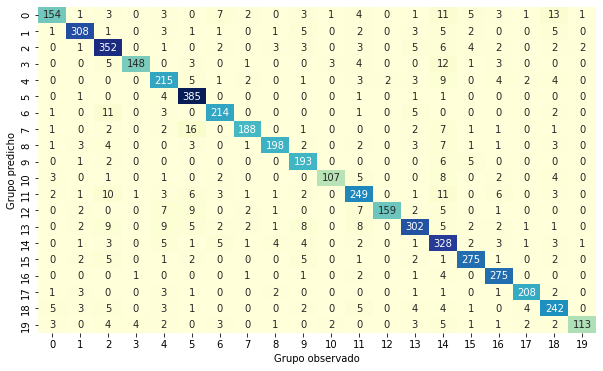

In [ ]:
def confusion():
  fig, ax = plt.subplots(figsize=(10, 6))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, cmap="YlGnBu", fmt = '0.0f')
  plt.xlabel("Grupo observado")
  plt.ylabel("Grupo predicho")
  plt.show()
  
confusion()

In [ ]:
topicosExtenso = ["Inversión","Hidrocarburos","Política Monetaria","Producción","Crecimiento Económico","Impuestos","Comercio exterior","Servicios Financieros","Contrabando",
                  "Servicios de Comunicación", "Empleo","Transporte de mercadería","Minería","Política salarial","Energía eléctrica","Materia prima","Jubilación","Inflación","Indutria Nacional","Transporte aéreo"]

In [ ]:
print(classification_report(y_test, y_pred, target_names = topicosExtenso))

                           precision    recall  f1-score   support

                Inversión       0.90      0.72      0.80       213
            Hidrocarburos       0.94      0.91      0.92       338
       Política Monetaria       0.84      0.91      0.88       386
               Producción       0.96      0.82      0.89       180
    Crecimiento Económico       0.81      0.86      0.83       251
                Impuestos       0.88      0.98      0.93       393
        Comercio exterior       0.89      0.90      0.90       237
    Servicios Financieros       0.94      0.85      0.89       222
              Contrabando       0.93      0.86      0.90       229
Servicios de Comunicación       0.84      0.93      0.88       207
                   Empleo       0.95      0.80      0.87       133
 Transporte de mercadería       0.83      0.83      0.83       300
                  Minería       0.99      0.82      0.89       195
        Política salarial       0.89      0.84      0.86     

**Árboles de decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=.3, random_state=0)
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
dtc.score(X_test, y_test)

0.618358256442889

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[163,  13,  14,   1,   5,   1,   9,   5,   2,   9,   2,  14,   3,
         10,   5,   9,   4,   5,  11,   5],
       [  8, 238,   3,   1,   4,  11,   3,   1,  19,   2,   1,  19,   2,
          5,  18,   7,   3,   4,  17,   1],
       [ 12,   5, 274,   6,   5,   2,  22,   4,  19,   3,   1,  18,   5,
         25,  15,   7,   3,   7,   8,  10],
       [  1,   2,   6, 146,   4,   1,   0,   2,   1,   0,   6,   5,   0,
          0,  11,   0,   0,   1,   4,   2],
       [  2,   5,   8,   3, 132,  13,   7,  16,   9,   2,   0,  13,  11,
         11,  13,   4,   9,   8,  16,   3],
       [  2,   4,   9,   0,  11, 398,   1,  23,   5,   2,   0,  12,  11,
         14,  10,   1,   0,   1,  11,   4],
       [ 11,   1,  20,   0,   6,   0, 158,   2,   2,   5,   2,  15,   5,
         16,   9,   2,   0,   0,   3,   3],
       [  1,   4,   9,   1,   8,  23,   2, 168,   4,   8,   0,  15,   5,
          9,   6,   4,   3,   1,  15,   1],
       [  1,  17,  27,   1,   6,   4,   1,   7, 163,   3,   1,  

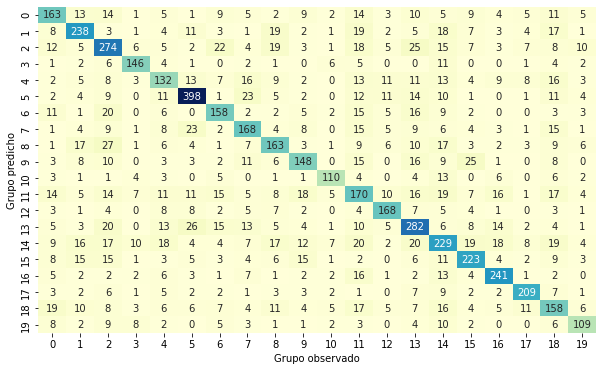

In [ ]:
confusion()

In [ ]:
print(classification_report(y_test, y_pred, target_names = topicosExtenso))

                           precision    recall  f1-score   support

                Inversión       0.58      0.56      0.57       290
            Hidrocarburos       0.67      0.65      0.66       367
       Política Monetaria       0.58      0.61      0.59       451
               Producción       0.75      0.76      0.75       192
    Crecimiento Económico       0.51      0.46      0.49       285
                Impuestos       0.76      0.77      0.77       519
        Comercio exterior       0.60      0.61      0.60       260
    Servicios Financieros       0.58      0.59      0.58       287
              Contrabando       0.56      0.55      0.56       296
Servicios de Comunicación       0.61      0.55      0.58       268
                   Empleo       0.74      0.67      0.71       164
 Transporte de mercadería       0.45      0.46      0.45       373
                  Minería       0.70      0.72      0.71       233
        Política salarial       0.60      0.65      0.62     

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.3, random_state=0)
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

0.7914412981228126

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[130  15  11   2  10  10  19   5   1   6   3  12   2   7  13  13   6   3
   19   3]
 [  3 329   0   0   0  10   0   0   1   4   0   3   1   1   4   4   3   1
    3   0]
 [  0   1 398   0   0   2   9   1   0   3   0   4   0  10   8   5   3   2
    1   4]
 [  0   1   4 163   1   4   0   0   0   0   3   3   0   1   5   1   4   1
    0   1]
 [  0   1   6   1 200  17   4   1   1   3   0   2   8   3  14   1  11  10
    2   0]
 [  0   3   3   0   1 507   0   1   0   0   0   1   0   2   0   0   0   0
    1   0]
 [  1   0   9   0   0   2 235   0   0   1   1   5   0   2   2   1   0   0
    1   0]
 [  0   1   7   1   4  46   0 197   1   6   0   2   2   2   7   6   4   0
    1   0]
 [  0   7  16   0   1   6   1   2 235   2   0   2   0  12   7   1   3   0
    1   0]
 [  0   1   2   0   0   1   0   1   0 237   0   1   0   5   2  16   0   0
    2   0]
 [  3   0   2   5   2   0   2   0   0   1 123   7   0   2  12   0   5   0
    0   0]
 [  1  15  23   6   5  19  14   4   2  18   3 216   2   4  18   1

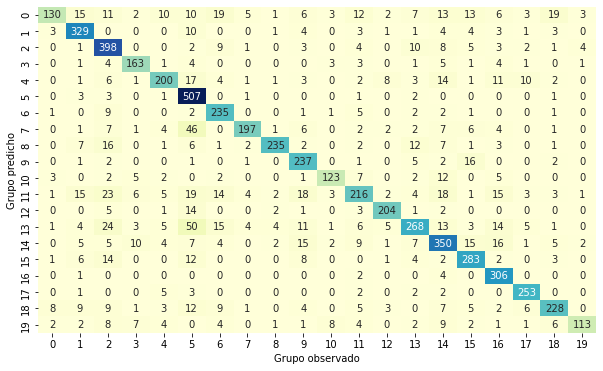

In [ ]:
confusion()

In [ ]:
print(classification_report(y_test, y_pred, target_names = topicosExtenso))

                           precision    recall  f1-score   support

                Inversión       0.87      0.45      0.59       290
            Hidrocarburos       0.82      0.90      0.86       367
       Política Monetaria       0.73      0.88      0.80       451
               Producción       0.82      0.85      0.83       192
    Crecimiento Económico       0.81      0.70      0.75       285
                Impuestos       0.70      0.98      0.82       519
        Comercio exterior       0.74      0.90      0.82       260
    Servicios Financieros       0.91      0.69      0.78       287
              Contrabando       0.94      0.79      0.86       296
Servicios de Comunicación       0.74      0.88      0.80       268
                   Empleo       0.85      0.75      0.80       164
 Transporte de mercadería       0.75      0.58      0.65       373
                  Minería       0.89      0.88      0.88       233
        Política salarial       0.80      0.61      0.69     

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.3, random_state=0)
nb = MultinomialNB().fit(X_train, y_train)

In [ ]:
nb.score(X_test, y_test)

0.606108813235762

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 31  16  63   2   3  17  12   0   0   4   0  36   0  29  41  10   1   0
   25   0]
 [  0 318   6   0   0  17   0   0   0   0   0   1   0   2  18   3   2   0
    0   0]
 [  0   0 436   0   0   6   0   0   0   0   0   0   0   6   1   2   0   0
    0   0]
 [  0   0  39  80   0   6   0   0   0   0   0   8   0   2  55   0   2   0
    0   0]
 [  0   1   9   0 169  37   1   0   1   0   0   5   0   5  50   0   6   0
    1   0]
 [  0   0   2   0   0 515   0   0   0   0   0   0   0   0   1   1   0   0
    0   0]
 [  0   1  58   0   0   1 180   0   0   0   0   6   0   0  14   0   0   0
    0   0]
 [  0   0  22   0   0 157   0  56   0   2   0   2   0  12  21   6   9   0
    0   0]
 [  0   8  56   0   0  25   0   1 136   0   0   0   0   9  57   4   0   0
    0   0]
 [  0   0  38   0   0   5   0   0   0 128   0   8   0  24  20  45   0   0
    0   0]
 [  0   0  37   0   1   1   3   0   0   0  28  31   0   2  57   0   3   0
    1   0]
 [  0   2  61   0   2  28   1   0   0   1   0 224   0   3  47   3

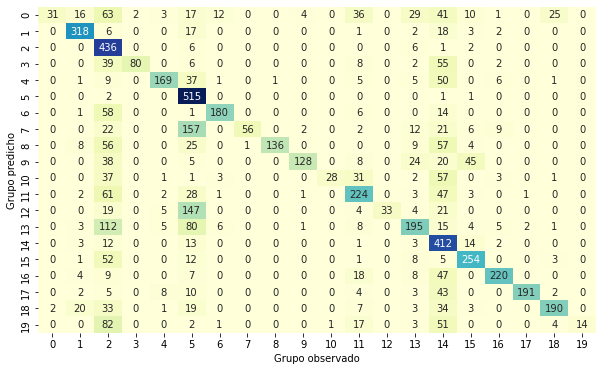

In [ ]:
confusion()